<a href="https://colab.research.google.com/github/Aliasgarchandan53/HarmonyMood/blob/main/songs_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/drive/MyDrive/final_dataset.csv")
df.head()

,Artist,SongTitle,BPM,Key,Genre,Vocal/Instrumental,EnergyLevel,SongStructure,Lyrics/Theme,Instrumentation,CulturalContext,Popularity,Era
0,EdSheeran,ShapeofYou,96,C#Minor,Pop,Vocal,High,Verse-Chorus,Romance,Synth,Contemporary,VeryHigh,2010s
1,EdSheeran,ThinkingOutLoud,78,DMajor,Pop,Vocal,Moderate,Verse-Chorus,Love,Guitar,Contemporary,VeryHigh,2010s
2,EdSheeran,CastleontheHill,135,EMajor,Pop,Vocal,High,Verse-Chorus,Nostalgia,Piano,Contemporary,High,2010s
3,EdSheeran,Photograph,108,EMajor,Pop,Vocal,Moderate,Verse-Chorus,Love,AcousticGuitar,Contemporary,High,2010s
4,EdSheeran,Perfect,63,GMajor,Pop,Vocal,Moderate,Verse-Chorus,Romance,Piano,Contemporary,VeryHigh,2010s


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info

<bound method DataFrame.info of                 Artist        SongTitle  BPM      Key       Genre  \
0            EdSheeran       ShapeofYou   96  C#Minor         Pop   
1            EdSheeran  ThinkingOutLoud   78   DMajor         Pop   
2            EdSheeran  CastleontheHill  135   EMajor         Pop   
3            EdSheeran       Photograph  108   EMajor         Pop   
4            EdSheeran          Perfect   63   GMajor         Pop   
...                ...              ...  ...      ...         ...   
2749  DhvaniBhanushali    PsychoSaiyaan  115  F#Minor   Bollywood   
2750            Mitraz         Beparwah   90   GMajor  PunjabiPop   
2751        NoorChahal            Sorry   80   AMajor     Punjabi   
2752        Anne-Marie             2003   96   AMajor         Pop   
2753            Zaeden      I'mJustABoy  115  C#Minor       Dance   

     Vocal/Instrumental EnergyLevel SongStructure      Lyrics/Theme  \
0                 Vocal        High  Verse-Chorus           Romance 

In [21]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Artist'] = le.fit_transform(df['Artist'])
df['SongTitle'] = le.fit_transform(df['SongTitle'])
df['Genre'] = le.fit_transform(df['Genre'])
df['BPM'] = le.fit_transform(df['BPM'])
df['Vocal/Instrumental'] = le.fit_transform(df['Vocal/Instrumental'])
df['EnergyLevel'] = le.fit_transform(df['EnergyLevel'])
df['SongStructure'] = le.fit_transform(df['SongStructure'])
df['Lyrics/Theme'] = le.fit_transform(df['Lyrics/Theme'])
df['Instrumentation'] = le.fit_transform(df['Instrumentation'])
df['CulturalContext'] = le.fit_transform(df['CulturalContext'])
df['Popularity'] = le.fit_transform(df['Popularity'])
df['Era'] = le.fit_transform(df['Era'])
df['Key']=le.fit_transform(df['Key'])


1. *Identify Outliers:*
   Begin by visualizing your data to spot potential outliers using box plots, histograms, or scatter plots.


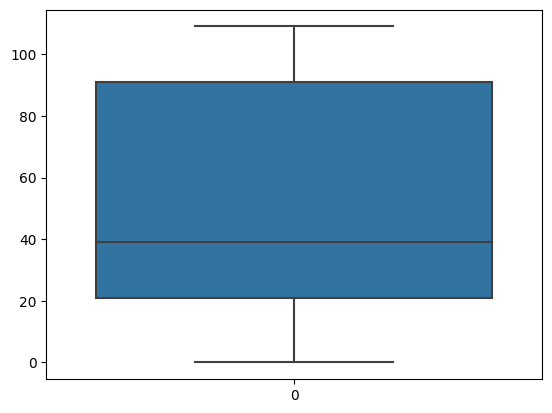

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for numeric columns
sns.boxplot(data=df["BPM"])
plt.show()


2. *Calculate Z-Scores:*
   Calculate the Z-score for each data point to measure how many standard deviations it is away from the mean.


In [22]:
from scipy.stats import zscore

z_scores = df.apply(zscore)

3. Outliers :-Identify rows that contain outliers based on their Z-scores.
Common strategies to handle outliers include removing them, replacing them with median values, or capping them at a certain value.


In [56]:
threshold = 3  #identifying outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)


In [63]:
# Remove rows containing outliers
df_cleaned = df[~outliers.any(axis=1)]


In [64]:
# Capping outliers at a certain value
cap_value = 3
df_cleaned[outliers] = cap_value



<ipython-input-64-f71d9181d3a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[outliers] = cap_value
<ipython-input-64-f71d9181d3a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[outliers] = cap_value


4. *Visualize After Handling Outliers:*
   Visualize the data again after handling outliers to see the impact of your treatment.


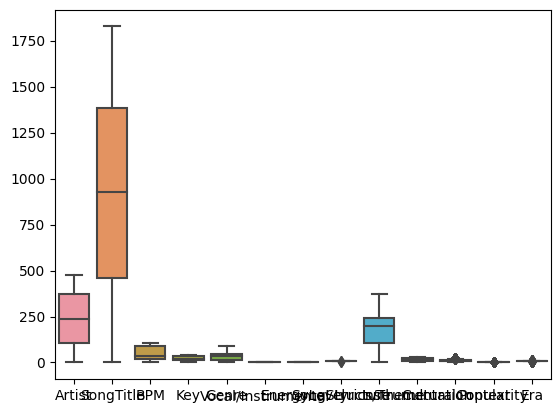

In [53]:
sns.boxplot(data=df_cleaned)
plt.show()


For remix ,compatibility prediction using the Pandas library for the dataset:-

In [54]:
#Available Features:

available_features = df.columns
print(available_features)



Index(['Artist', 'SongTitle', 'BPM', 'Key', 'Genre', 'Vocal/Instrumental',
       'EnergyLevel', 'SongStructure', 'Lyrics/Theme', 'Instrumentation',
       'CulturalContext', 'Popularity', 'Era'],
      dtype='object')


In [65]:
#Relevant Features:
selected_features = ['BPM', 'Key', 'EnergyLevel', 'Genre']
df_selected = df[selected_features]


In [66]:
#Categorical Features:
#one hot encoding
df_encoded = pd.get_dummies(df_selected, columns=['Genre'])


In [67]:
#Missing Data:
# Check for missing values
missing_values = df_selected.isnull().sum()
print(missing_values)


BPM            0
Key            0
EnergyLevel    0
Genre          0
dtype: int64


In [68]:
# Handling the missing values
df_selected['BPM'].fillna(df_selected['BPM'].mean(), inplace=True)


<ipython-input-68-576e8aca0c5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['BPM'].fillna(df_selected['BPM'].mean(), inplace=True)


In [69]:
# Normalizing Numeric Features:
#     Normalizing numeric features to ensure they have a similar scale,
#    which can improve the performance of some machine learning algorithms.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_columns = ['BPM', 'EnergyLevel']
df_selected[numeric_columns] = scaler.fit_transform(df_selected[numeric_columns])


<ipython-input-69-5026584abe50>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[numeric_columns] = scaler.fit_transform(df_selected[numeric_columns])


 Visualize Selected Features :
   You can create visualizations to understand the distribution and relationships among the selected features.


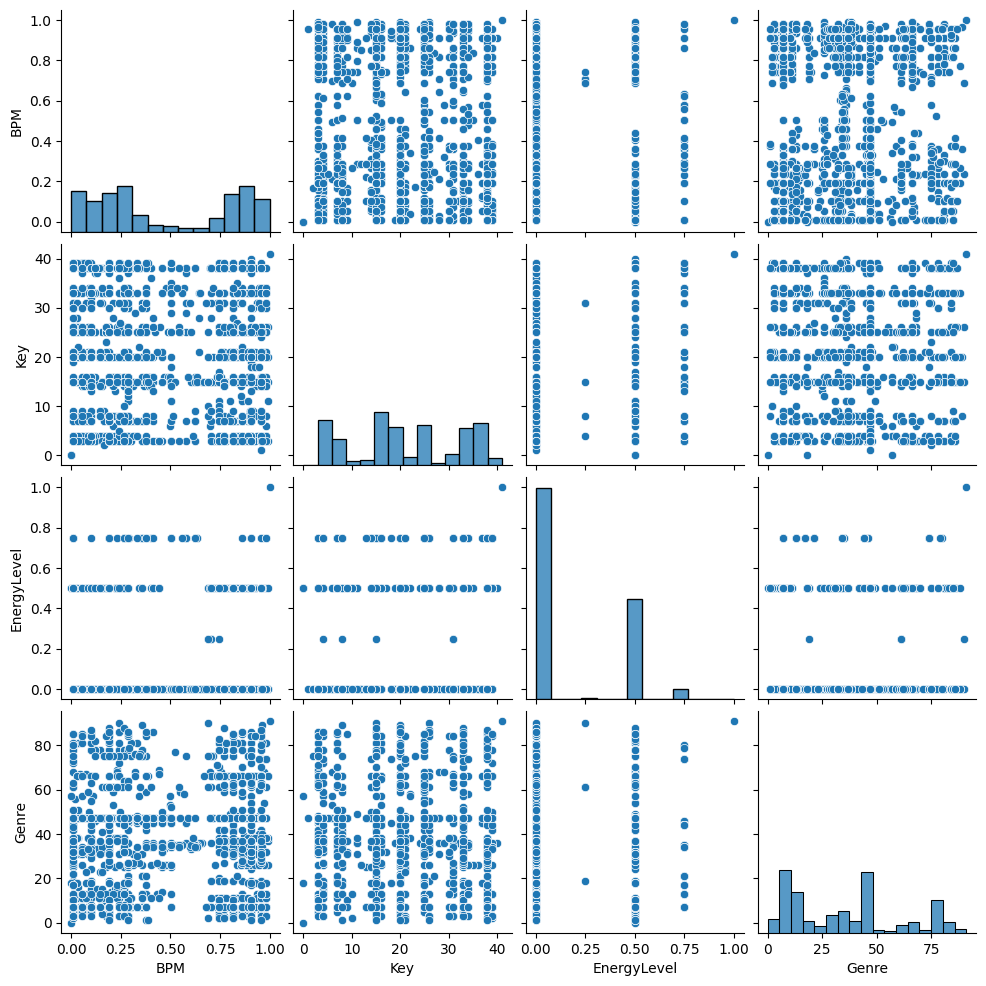

In [70]:
# import matplotlib.pyplot as plt
# import seaborn as sns

sns.pairplot(df_selected)
plt.show()


Splitting the dataset into testing and training daata :-

In [74]:
from sklearn.model_selection import train_test_split

target_column = selected_features

# Splitting the dataset into 80% train, 10% validation, and 10% test
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Separating the features and target variables
X_train = train_df.drop(columns=target_column)
y_train = train_df[target_column]
X_val = val_df.drop(columns=target_column)
y_val = val_df[target_column]
X_test = test_df.drop(columns=target_column)
y_test = test_df[target_column]



In [75]:
#Verifying the split :-

print("Training set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)
print("Test set shapes:", X_test.shape, y_test.shape)


Training set shapes: (1702, 9) (1702, 4)
Validation set shapes: (213, 9) (213, 4)
Test set shapes: (213, 9) (213, 4)


Model Selection :-

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


In [77]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Neural Network (MLP)": MLPRegressor()
}

for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions on the validation set
    y_val_pred = model.predict(X_val)

    # Calculating Mean Squared Error (MSE) as a performance metric
    mse = mean_squared_error(y_val, y_val_pred)

    print(f"{model_name} - MSE: {mse:.2f}")


Linear Regression - MSE: 525.00
Random Forest Regressor - MSE: 412.88
Neural Network (MLP) - MSE: 556.43
